## Kaggle - Titanic 
`Goal: predict what sorts of people were likely to survive from the tragedy`
    
    opendata sources: data.gov, public dataset on AWS, google public data

In [181]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import random
random.seed(42)

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [182]:
train_df = pd.read_csv('/Users/joanna/Udemy_Python/Titanic_data_all/train.csv')
test_df = pd.read_csv('/Users/joanna/Udemy_Python/Titanic_data_all/test.csv')
submit = pd.read_csv('/Users/joanna/Udemy_Python/Titanic_data_all/gender_submission.csv')

In [183]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [184]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [185]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [186]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [187]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Combine Train and Test Data

In [188]:
data_df = train_df.append(test_df)
data_df.reset_index(inplace = True, drop = True)
data_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


## Data Analysis
#### Questions

    1.Who were the passengers on the Titanic? (ages, gender, class, etc.)

    2.What deck were the passengers on and how does that relate to their class?

    3.Where did the passengers come from?

    4.Who was alone and who was with family?

    5.What factors helped someone survive the sinking?

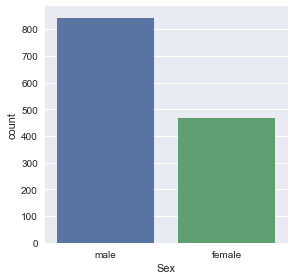

In [189]:
#Q1: Who were the passengers on the Titanic?
#check the gender
sns.factorplot('Sex', data = data_df, kind = 'count')

    * note: male > female (9:4.5)

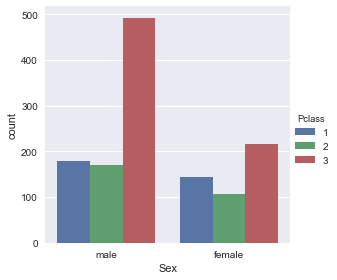

In [190]:
#seperate the genders by classes
sns.factorplot('Sex', data=data_df, hue='Pclass', kind='count')

    * note: most of males/females are in 3rd class

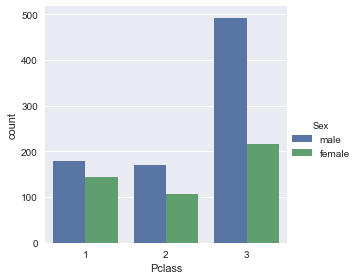

In [191]:
#different gender in different classes
sns.factorplot('Pclass', data = data_df, hue = 'Sex', kind='count')

In [192]:
#define a function to tell who the children are
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [193]:
#create a column called person to put above result in it 
data_df['person'] = data_df[['Age','Sex']].apply(male_female_child, axis = 1)

In [194]:
data_df[0:10]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,person
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,male
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,female
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,female
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,female
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,male
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,male
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,male
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,child
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,female
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,child


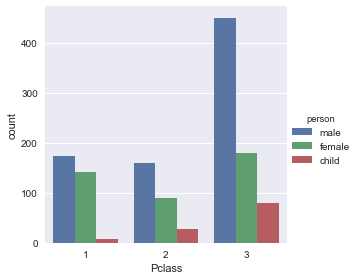

In [195]:
#create a plot to see dif person(m,f,child) in each class
sns.factorplot('Pclass', data=data_df, hue='person', kind='count')

    * note: result: more children are in 3rd class too

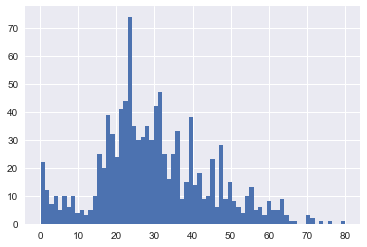

In [196]:
#see the normal distribution of age
data_df['Age'].hist(bins=70)

    * note: most of children are under 10, and most of adults are at 20-30

In [197]:
data_df['Age'].mean()

29.881137667304014

In [198]:
data_df['person'].value_counts()

male      784
female    410
child     115
Name: person, dtype: int64

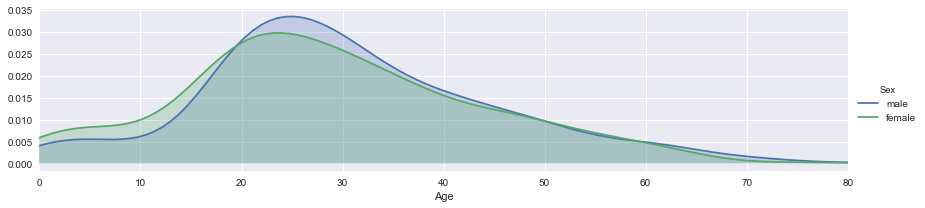

In [199]:
#FacetGrid - do multiple plots on one figure
figure = sns.FacetGrid(data_df, hue='Sex', aspect = 4) #aspect ratio to stretch out the plot
figure.map(sns.kdeplot, 'Age', shade=True)
oldest = data_df['Age'].max()
figure.set(xlim = (0,oldest))
figure.add_legend() 

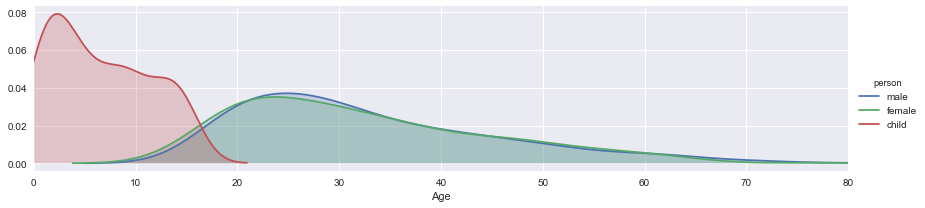

In [200]:
#see how different person by class
figure = sns.FacetGrid(data_df, hue='person', aspect = 4) 
figure.map(sns.kdeplot, 'Age', shade=True)
oldest = data_df['Age'].max()
figure.set(xlim = (0,oldest))
figure.add_legend() 

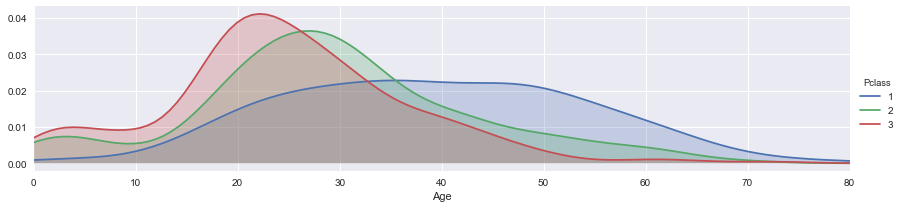

In [201]:
#see how ages ranged by class
figure = sns.FacetGrid(data_df, hue='Pclass', aspect = 4) 
figure.map(sns.kdeplot, 'Age', shade=True)
oldest = data_df['Age'].max()
figure.set(xlim = (0,oldest))
figure.add_legend() 

    * note: 1st class is normal distribution; the others are not

In [202]:
#Q2: What deck were the passengers on and how does that relate to their class?
#drop null data in Cabin, create a new data called deck
Cabin_deck = data_df['Cabin'].dropna()
Cabin_deck[0:10]

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

    * note: we can classify the Cabin by its first letter (e.g. ABCDE..)

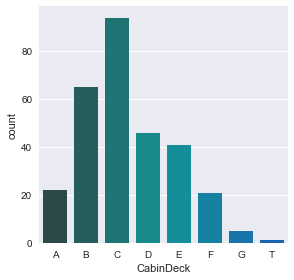

In [203]:
#grab the fist letter for the deck level
#create an empty list
levels = []

# Loop to grab first letter
for level in Cabin_deck:
    levels.append(level[0]) #level[0] - the first letter of deck

cabin_df = DataFrame(sorted(levels))
cabin_df.columns = ['CabinDeck']

#plot
sns.factorplot('CabinDeck', data = cabin_df, palette ='winter_d', kind = 'count')

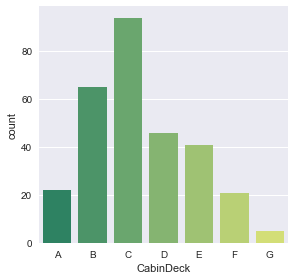

In [204]:
#drop T which doesn't make sense （只有一個乘客在T艙不合理，應該是數據登入錯誤，所以刪掉）
cabin_df = cabin_df[cabin_df.CabinDeck != 'T']
sns.factorplot('CabinDeck', data = cabin_df, palette ='summer', kind = 'count')

    * note: Cabin C has the most number of passengers

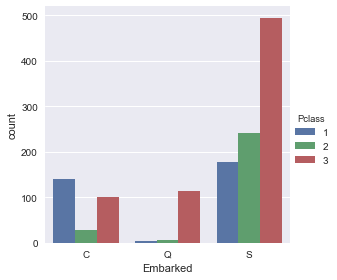

In [205]:
#Q3: Where did the passengers come from? (Embarked - Embarkation)
sns.factorplot('Embarked', data = data_df, hue = 'Pclass', kind = 'count', x_order = ['C','Q','S'])

    * note: in Queenstown, people boarded on 3rd class, while in Cherbourg, most ppl boarded on 1st class

In [206]:
#Q4: Who was alone and who was with family?
#alone = both SibSp & Parch = 0
data_df['Alone_or_not'] = data_df['SibSp'] = data_df['Parch']
data_df['Alone_or_not'][0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Alone_or_not, dtype: int64

In [207]:
data_df['Alone_or_not'].loc[data_df['Alone_or_not'] > 0] = 'With Family'
data_df['Alone_or_not'].loc[data_df['Alone_or_not'] == 0] = 'Alone'

In [208]:
data_df.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,person,Alone_or_not
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,0,0.0,A/5 21171,male,Alone
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,0,1.0,PC 17599,female,Alone
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,female,Alone


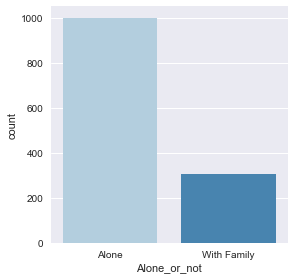

In [209]:
sns.factorplot('Alone_or_not', data = data_df, kind = 'count', palette = 'Blues')

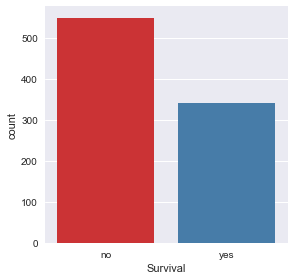

In [210]:
#Q5: survive
#add a new column called survival to show who survive or not (iterate 1&0 in survived column) *use .map()
data_df['Survival'] = data_df['Survived'].map({0:'no',1:'yes'})
sns.factorplot('Survival', data = data_df, kind = 'count', palette = 'Set1')

    * note: survive < not survive (3.5:5.5)

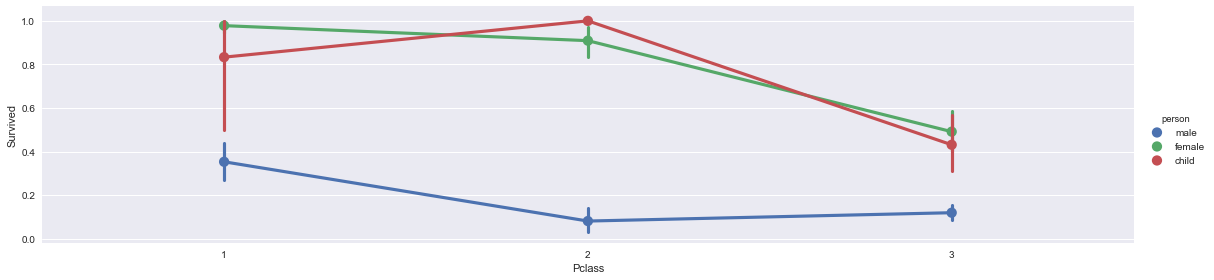

In [211]:
#varify if people in the 3rd class died more than those who in the 1st class
sns.factorplot('Pclass', 'Survived', hue='person', data=data_df, aspect = 4)

    * note: ppl in 1st class has nearly higher survival rate, while ppl in 3rd class are opposite

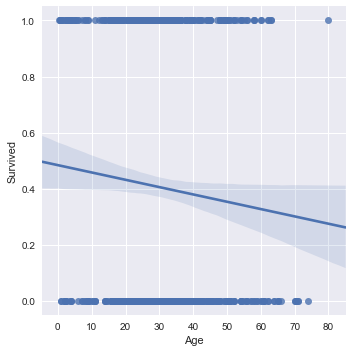

In [212]:
sns.lmplot('Age','Survived',data=data_df)

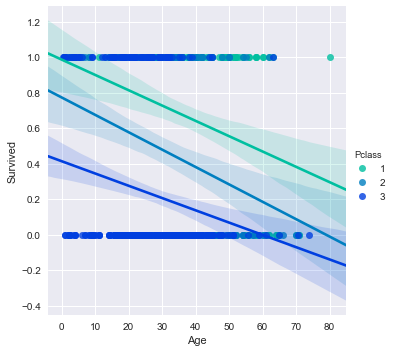

In [213]:
#survival rate combing age and class
sns.lmplot('Age','Survived', hue='Pclass', data=data_df, palette = 'winter_r')

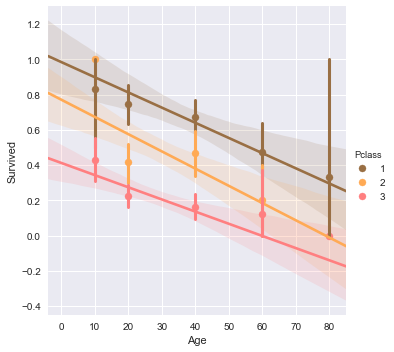

In [214]:
#连续变量也可以使用x_bins参数离散化
#用xbin來呈現特定Age的數值，而非每個單一數值

generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue='Pclass', data=data_df, x_bins=generations, palette='spring_d')

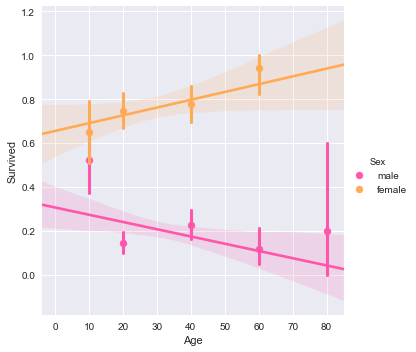

In [215]:
#see how sex is related to age and survival
sns.lmplot('Age', 'Survived', hue='Sex', data=data_df, x_bins=generations, palette='spring')

    * note1: the older females are, the higher survival rate they have 
    * note2: the older males are, the higher dead rate they are

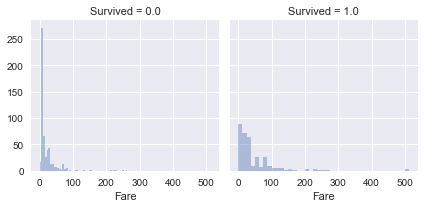

In [216]:
#fare
grid = sns.FacetGrid(data_df, col='Survived')
grid.map(sns.distplot, 'Fare', kde = False)

    * note: the lower the fare, the higher the dead rate 

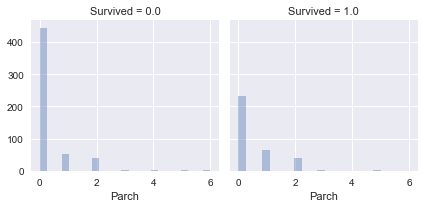

In [217]:
#Parch
grid = sns.FacetGrid(data_df, col='Survived')
grid.map(sns.distplot,'Parch', kde = False)

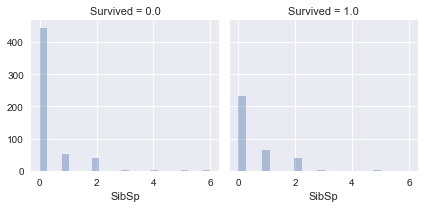

In [218]:
#SibSp
grid = sns.FacetGrid(data_df, col='Survived')
grid.map(sns.distplot,'SibSp', kde = False)

In [219]:
data_df['Family_Size'] = data_df['Parch'] + data_df['SibSp']  

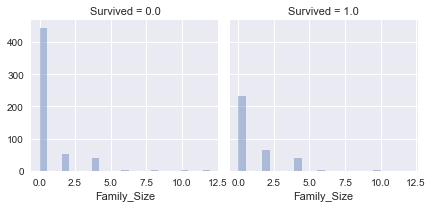

In [220]:
#Family Size
grid = sns.FacetGrid(data_df, col='Survived')
grid.map(sns.distplot,'Family_Size', kde = False)

    * note: those who came alone have higher dead rate

## Feature Engineering

In [221]:
#Name
data_df.head(4)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,person,Alone_or_not,Survival,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,0,0.0,A/5 21171,male,Alone,no,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,0,1.0,PC 17599,female,Alone,yes,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,female,Alone,yes,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,0,1.0,113803,female,Alone,yes,0


In [222]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age             1046 non-null float64
Cabin           295 non-null object
Embarked        1307 non-null object
Fare            1308 non-null float64
Name            1309 non-null object
Parch           1309 non-null int64
PassengerId     1309 non-null int64
Pclass          1309 non-null int64
Sex             1309 non-null object
SibSp           1309 non-null int64
Survived        891 non-null float64
Ticket          1309 non-null object
person          1309 non-null object
Alone_or_not    1309 non-null object
Survival        891 non-null object
Family_Size     1309 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 163.7+ KB


In [223]:
#fix Cabin
data_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [224]:
data_df['Cabin_new'] = data_df['Cabin'].apply(lambda x: str(x)[0] if not pd.isnull(x) else 'No Cabin')

In [225]:
data_df['Cabin_new'].unique()

array(['No Cabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [226]:
data_df.groupby(['Cabin_new'])['Cabin_new'].count()

Cabin_new
A             22
B             65
C             94
D             46
E             41
F             21
G              5
No Cabin    1014
T              1
Name: Cabin_new, dtype: int64

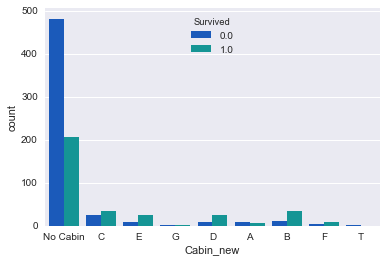

In [227]:
sns.countplot('Cabin_new', hue = 'Survived', data = data_df, palette='winter')

In [228]:
#fix NaN embarked 
data_df[data_df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,person,Alone_or_not,Survival,Family_Size,Cabin_new
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,female,Alone,yes,0,B
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,female,Alone,yes,0,B


In [229]:
data_df.groupby(['Embarked'])['Embarked'].count()

Embarked
C    270
Q    123
S    914
Name: Embarked, dtype: int64

In [230]:
data_df[data_df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,person,Alone_or_not,Survival,Family_Size,Cabin_new
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,female,Alone,yes,0,B
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,female,Alone,yes,0,B


In [231]:
data_df['Embarked'].fillna('S').unique()

array(['S', 'C', 'Q'], dtype=object)

In [232]:
data_df.groupby(['Embarked'])['Embarked'].count()

Embarked
C    270
Q    123
S    914
Name: Embarked, dtype: int64

In [233]:
#fill null fare with avg fare 
data_df[data_df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,person,Alone_or_not,Survival,Family_Size,Cabin_new
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,male,Alone,NaN,0,No Cabin


In [234]:
data_df['Fare'] = data_df['Fare'].fillna(data_df['Fare'].mean())

In [235]:
data_df[data_df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,person,Alone_or_not,Survival,Family_Size,Cabin_new


In [236]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
Age             1046 non-null float64
Cabin           295 non-null object
Embarked        1307 non-null object
Fare            1309 non-null float64
Name            1309 non-null object
Parch           1309 non-null int64
PassengerId     1309 non-null int64
Pclass          1309 non-null int64
Sex             1309 non-null object
SibSp           1309 non-null int64
Survived        891 non-null float64
Ticket          1309 non-null object
person          1309 non-null object
Alone_or_not    1309 non-null object
Survival        891 non-null object
Family_Size     1309 non-null int64
Cabin_new       1309 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 173.9+ KB


In [237]:
#fix Name
data_df['Title'] = data_df['Name'].str.split(",", expand = True)[1]
data_df['Name'].str.split(",", expand = True).head(2)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)


In [238]:
data_df['Title'] = data_df['Title'].str.split(".", expand = True)[0]
data_df['Title'].head(3)

0       Mr
1      Mrs
2     Miss
Name: Title, dtype: object

In [239]:
data_df['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [240]:
pd.crosstab(data_df['Title'], data_df['Survived']).T.style.background_gradient(cmap = 'spring')

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [241]:
#the avg age of dif titles
data_df.groupby(['Title'])['Age'].mean()

Title
 Capt            70.000000
 Col             54.000000
 Don             40.000000
 Dona            39.000000
 Dr              43.571429
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master           5.482642
 Miss            21.774238
 Mlle            24.000000
 Mme             24.000000
 Mr              32.252151
 Mrs             36.994118
 Ms              28.000000
 Rev             41.250000
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

In [242]:
pd.crosstab(data_df['Title'], data_df['Sex']).T.style.background_gradient(cmap = 'spring')

Title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [243]:
 data_df['Title_new'] = data_df['Title'].replace(
     ['Capt','Col','Don','Dona','Dr','Jonkheer','Lady','Major','Master','Miss','Mlle','Mme','Mr','Mrs','Ms','Rev','Sir','the Countess', 'Mra'], 
     ['Mr','Mr','Mr','Mrs','Mr','Mr','Mrs','Mr','Master','Miss','Miss','Miss','Mr','Mrs','Miss','Mr','Mr','Mrs', 'Mrs'], regex=True)

In [244]:
data_df['Title_new'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master'], dtype=object)

In [245]:
data_df.groupby(['Title_new'])['Age'].mean()

Title_new
 Master     5.482642
 Miss      21.834533
 Mr        32.811056
 Mrs       37.046243
Name: Age, dtype: float64

In [246]:
data_df.groupby(['Title_new', 'Pclass'])['Age'].mean()

Title_new  Pclass
 Master    1          6.984000
           2          2.757273
           3          6.090000
 Miss      1         30.032258
           2         20.865714
           3         17.360874
 Mr        1         42.241497
           2         32.914966
           3         28.318910
 Mrs       1         43.071429
           2         33.518519
           3         32.326531
Name: Age, dtype: float64

In [247]:
pd.crosstab(data_df['Title_new'], data_df['Sex']).T.style.background_gradient(cmap = 'spring')

Title_new,Master,Miss,Mr,Mrs
Sex,,,,
female,0,265,1,200
male,61,0,782,0


In [248]:
pd.crosstab(data_df['Title_new'], data_df['Survived']).T.style.background_gradient(cmap = 'spring')

Title_new,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,131,87,101


In [249]:
#ticket 
data_df['Ticket_new'] = data_df['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(" ")[0] if not x.isdigit() else "X")


In [250]:
data_df['Ticket_new'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS', 'SOP',
       'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS',
       'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4', 'A',
       'LP', 'AQ3'], dtype=object)

In [251]:
#alone = 0, with family = 1
#can also use code to convert: astype('category').cat.codes
data_df['Alone_or_not'].unique()

array(['Alone', 'With Family'], dtype=object)

In [252]:
data_df['Alone_or_not'] = data_df['Alone_or_not'].replace(['Alone', 'With Family'], [0,1])

In [253]:
data_df['Alone_or_not'].unique()

array([0, 1])

In [254]:
#already drop original columns of name, ticket, cabin, title
data_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,person,Alone_or_not,Survival,Family_Size,Cabin_new,Title,Title_new,Ticket_new
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,0,0.0,A/5 21171,male,0,no,0,No Cabin,Mr,Mr,A5
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,0,1.0,PC 17599,female,0,yes,0,C,Mrs,Mrs,PC
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,female,0,yes,0,No Cabin,Miss,Miss,STONO2
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,0,1.0,113803,female,0,yes,0,C,Mrs,Mrs,X
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,male,0,no,0,No Cabin,Mr,Mr,X


In [255]:
data_df['Sex'] = data_df['Sex'].astype('category').cat.codes
data_df['Embarked'] = data_df['Embarked'].astype('category').cat.codes
data_df['Pclass'] = data_df['Pclass'].astype('category').cat.codes
data_df['Title_new'] = data_df['Title_new'].astype('category').cat.codes
data_df['Ticket_new'] = data_df['Ticket_new'].astype('category').cat.codes
data_df['Cabin_new'] = data_df['Cabin_new'].astype('category').cat.codes

In [256]:
data_df.dtypes

Age             float64
Cabin            object
Embarked           int8
Fare            float64
Name             object
Parch             int64
PassengerId       int64
Pclass             int8
Sex                int8
SibSp             int64
Survived        float64
Ticket           object
person           object
Alone_or_not      int64
Survival         object
Family_Size       int64
Cabin_new          int8
Title            object
Title_new          int8
Ticket_new         int8
dtype: object

In [388]:
NoAge = data_df[data_df['Age'].isnull()]
HaveAge = data_df[data_df['Age'].notnull()]
remove_outlier = HaveAge[(np.abs(HaveAge['Fare'] - HaveAge['Fare'].mean())>(4*HaveAge['Fare'].std()))|(np.abs(np.abs(HaveAge['Fare'] - HaveAge['Family_Size'].mean())>(4*HaveAge['Family_Size'].std())))]
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
age_col = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title_new','Cabin_new','Ticket_new']
rfModel_age.fit(remove_outlier[age_col], remove_outlier['Age'])
NoAge_pred = rfModel_age.predict(X= NoAge[age_col])
NoAge.loc[:,"Age"] = NoAge_pred
data_df = NoAge.append(HaveAge)
data_df.reset_index(inplace=True, drop=True)


## Predictive Analysis
#### Machine Learning - Random Forest

In [389]:
Train = data_df[pd.notnull(data_df['Survived'])].sort_values(by=["PassengerId"])
Test = data_df[~pd.notnull(data_df['Survived'])].sort_values(by=["PassengerId"])

In [390]:
Train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,person,Alone_or_not,Survival,Family_Size,Cabin_new,Title,Title_new,Ticket_new
263,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,2,1,0,0.0,A/5 21171,male,0,no,0,7,Mr,2,2
264,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,0,0,1.0,PC 17599,female,0,yes,0,2,Mrs,3,14
265,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,2,0,0,1.0,STON/O2. 3101282,female,0,yes,0,7,Miss,1,31
266,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,0,0,1.0,113803,female,0,yes,0,2,Mrs,3,36
267,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,2,1,0,0.0,373450,male,0,no,0,7,Mr,2,36


In [391]:
Test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,person,Alone_or_not,Survival,Family_Size,Cabin_new,Title,Title_new,Ticket_new
977,34.5,NaN,1,7.8292,"Kelly, Mr. James",0,892,2,1,0,NaN,330911,male,0,NaN,0,7,Mr,2,36
978,47.0,NaN,2,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,2,0,0,NaN,363272,female,0,NaN,0,7,Mrs,3,36
979,62.0,NaN,1,9.6875,"Myles, Mr. Thomas Francis",0,894,1,1,0,NaN,240276,male,0,NaN,0,7,Mr,2,36
980,27.0,NaN,2,8.6625,"Wirz, Mr. Albert",0,895,2,1,0,NaN,315154,male,0,NaN,0,7,Mr,2,36
981,22.0,NaN,2,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,2,0,1,NaN,3101298,female,1,NaN,2,7,Mrs,3,36


In [392]:
Train.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'person',
       'Alone_or_not', 'Survival', 'Family_Size', 'Cabin_new', 'Title',
       'Title_new', 'Ticket_new'],
      dtype='object')

In [393]:
Test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'person',
       'Alone_or_not', 'Survival', 'Family_Size', 'Cabin_new', 'Title',
       'Title_new', 'Ticket_new'],
      dtype='object')

In [394]:
Train_df = Train[['Survived','Age','Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size','Alone_or_not', 'Title_new','Ticket_new','Cabin_new']]
Test_df = Test[['Age','Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Alone_or_not','Title_new','Ticket_new','Cabin_new']]

In [395]:
Train_df.head()

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Alone_or_not,Title_new,Ticket_new,Cabin_new
263,0.0,22.0,2,7.2500,2,1,0,0,2,2,7
264,1.0,38.0,0,71.2833,0,0,0,0,3,14,2
265,1.0,26.0,2,7.9250,2,0,0,0,1,31,7
266,1.0,35.0,2,53.1000,0,0,0,0,3,36,2
267,0.0,35.0,2,8.0500,2,1,0,0,2,36,7


In [420]:
rf = RandomForestClassifier(criterion = 'gini',
                           n_estimators = 1000,
                           min_samples_split = 12,
                           min_samples_leaf = 1,
                           max_depth = 8,
                           oob_score = True,
                           random_state = 1,
                           n_jobs = -1)

In [421]:
rf.fit(Train_df.iloc[:, 1:], Train_df.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8350


In [422]:
pd.concat((pd.DataFrame(Train_df.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.299715
7,Title_new,0.163109
2,Fare,0.150197
0,Age,0.114448
3,Pclass,0.106521
9,Cabin_new,0.075430
1,Embarked,0.029658
8,Ticket_new,0.027330
5,Family_Size,0.023142
6,Alone_or_not,0.010449


In [427]:
rf_pred =  rf.predict(Test_df)
submit['Survived'] = rf_pred.astype(int)
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [428]:
submit.to_csv('submit.csv', index= False)